In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Corrected module name
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score,auc,f1_score,precision_recall_curve
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score, classification_report, confusion_matrix, accuracy_score  # Corrected module name

In [14]:
data = pd.read_csv(r'C:\Users\lenovo\OneDrive\Desktop (1)\Desktop\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [15]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

DATA PREPROCESSING

In [33]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [35]:
#Standard deviation of each column for the above transposed data.
data.apply(np.std) 

Pregnancies                   3.367384
Glucose                      31.951796
BloodPressure                19.343202
SkinThickness                15.941829
Insulin                     115.168949
BMI                           7.879026
DiabetesPedigreeFunction      0.331113
Age                          11.752573
Outcome                       0.476641
dtype: float64

In [39]:
data_positive=data[data['Outcome']==1]
data_negative=data[data['Outcome']==0]
print('The count of positive data =', data_positive.shape)
print('The count of negative data =', data_negative.shape)

The count of positive data = (268, 9)
The count of negative data = (500, 9)


Glucose

In [17]:
data['Glucose'].value_counts().head(6)

Glucose
99     17
100    17
111    14
125    14
129    14
106    14
Name: count, dtype: int64

Mean of Glucose level: 120.89453125
Datatype of Glucose Variable: int64


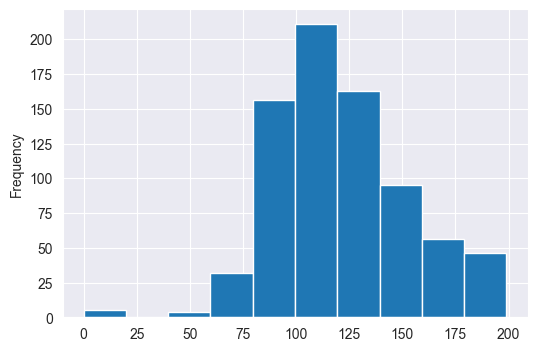

In [77]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('Glucose Class')
data['Glucose'].plot.hist()
sns.set_style(style='whitegrid')
print("Mean of Glucose level:", data['Glucose'].mean())
print("Datatype of Glucose Variable:",data['Glucose'].dtypes)

In [21]:
glucose_zero=data[data['Glucose']==0]
glucose_not_zero=data[data['Glucose']!=0]

In [22]:
glucose_zero.shape #in rows and columns

(5, 9)

In [23]:
glucose_not_zero.shape

(763, 9)

Bloodpressure

In [24]:
data['BloodPressure'].value_counts().head(6)

BloodPressure
70    57
74    52
78    45
68    45
72    44
64    43
Name: count, dtype: int64

Mean of BloodPressure level:- 69.10546875
Datatype of BloodPressure Variable: int64


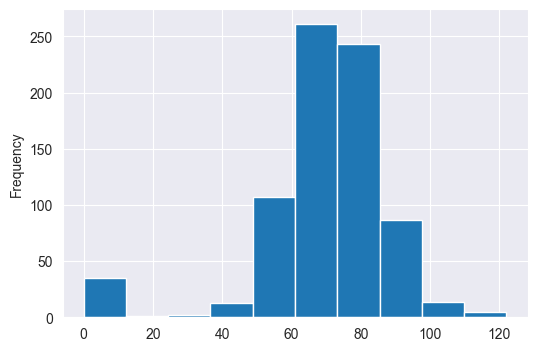

In [33]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('BloodPressure Class')
data['BloodPressure'].plot.hist()
sns.set_style(style='whitegrid')
print("Mean of BloodPressure level:-", data['BloodPressure'].mean())
print("Datatype of BloodPressure Variable:",data['BloodPressure'].dtypes)

In [35]:

BP_Zero = data[data['BloodPressure'] == 0]
BP_notZero = data[data['BloodPressure']!= 0]


In [37]:
BP_Zero.shape

(35, 9)

In [38]:
BP_notZero.shape

(733, 9)

SkinThickness


In [46]:
data['SkinThickness'].value_counts().head(6)

SkinThickness
0     227
32     31
30     27
27     23
23     22
18     20
Name: count, dtype: int64

Mean of SkinThickness: 20.536458333333332
Datatype of SkinThickness variable: int64


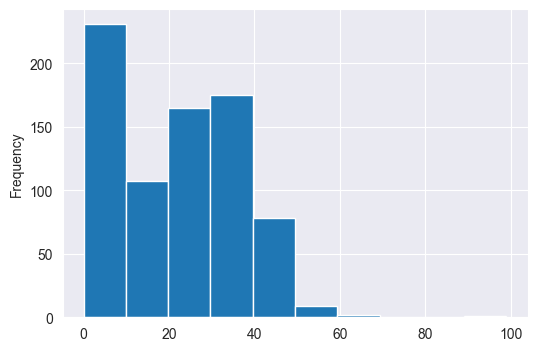

In [81]:
#plotting the graph
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('SkinThickness Class')
data['SkinThickness'].plot.hist()
sns.set_style(style='whitegrid')
print("Mean of SkinThickness:",data['SkinThickness'].mean())
print("Datatype of SkinThickness variable:",data['SkinThickness'].dtypes)

In [56]:
skin_Zero=data[data['SkinThickness']==0]
skin_notZero=data[data['SkinThickness']!=0]

In [57]:
skin_Zero.shape

(227, 9)

In [58]:
skin_notZero.shape

(541, 9)

Insulin

In [59]:
data['Insulin'].value_counts().head(6)

Insulin
0      374
105     11
130      9
140      9
120      8
94       7
Name: count, dtype: int64

Mean of the Insulin: 79.79947916666667
Datatype of Insulin: int64


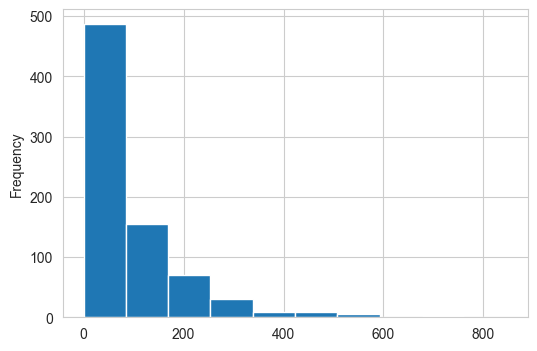

In [96]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('Insulin Class')
data['Insulin'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of the Insulin:",data['Insulin'].mean())
print("Datatype of Insulin:",data['Insulin'].dtypes)

In [86]:
ins_zero = data[data['Insulin'] == 0]
ins_notzero = data[data['Insulin'] != 0]

In [87]:
ins_zero.shape

(374, 9)

In [88]:
ins_notzero.shape

(394, 9)

In [89]:
data['BMI'].value_counts().head(6)

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
33.3    10
Name: count, dtype: int64

Mean of BMI: 31.992578124999998
Datatype of BMI: float64


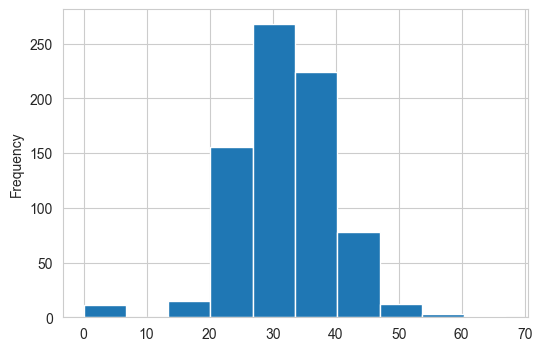

In [95]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('BMI class')
data['BMI'].plot.hist()
sns.set_style(style='whitegrid')
print("Mean of BMI:",data['BMI'].mean())
print("Datatype of BMI:",data['BMI'].dtypes)


In [98]:
BMI_zero=data[data['BMI']==0]
BMI_notzero=data[data['BMI']!=0]

In [100]:
BMI_zero.shape

(11, 9)

In [101]:
BMI_notzero.shape

(757, 9)

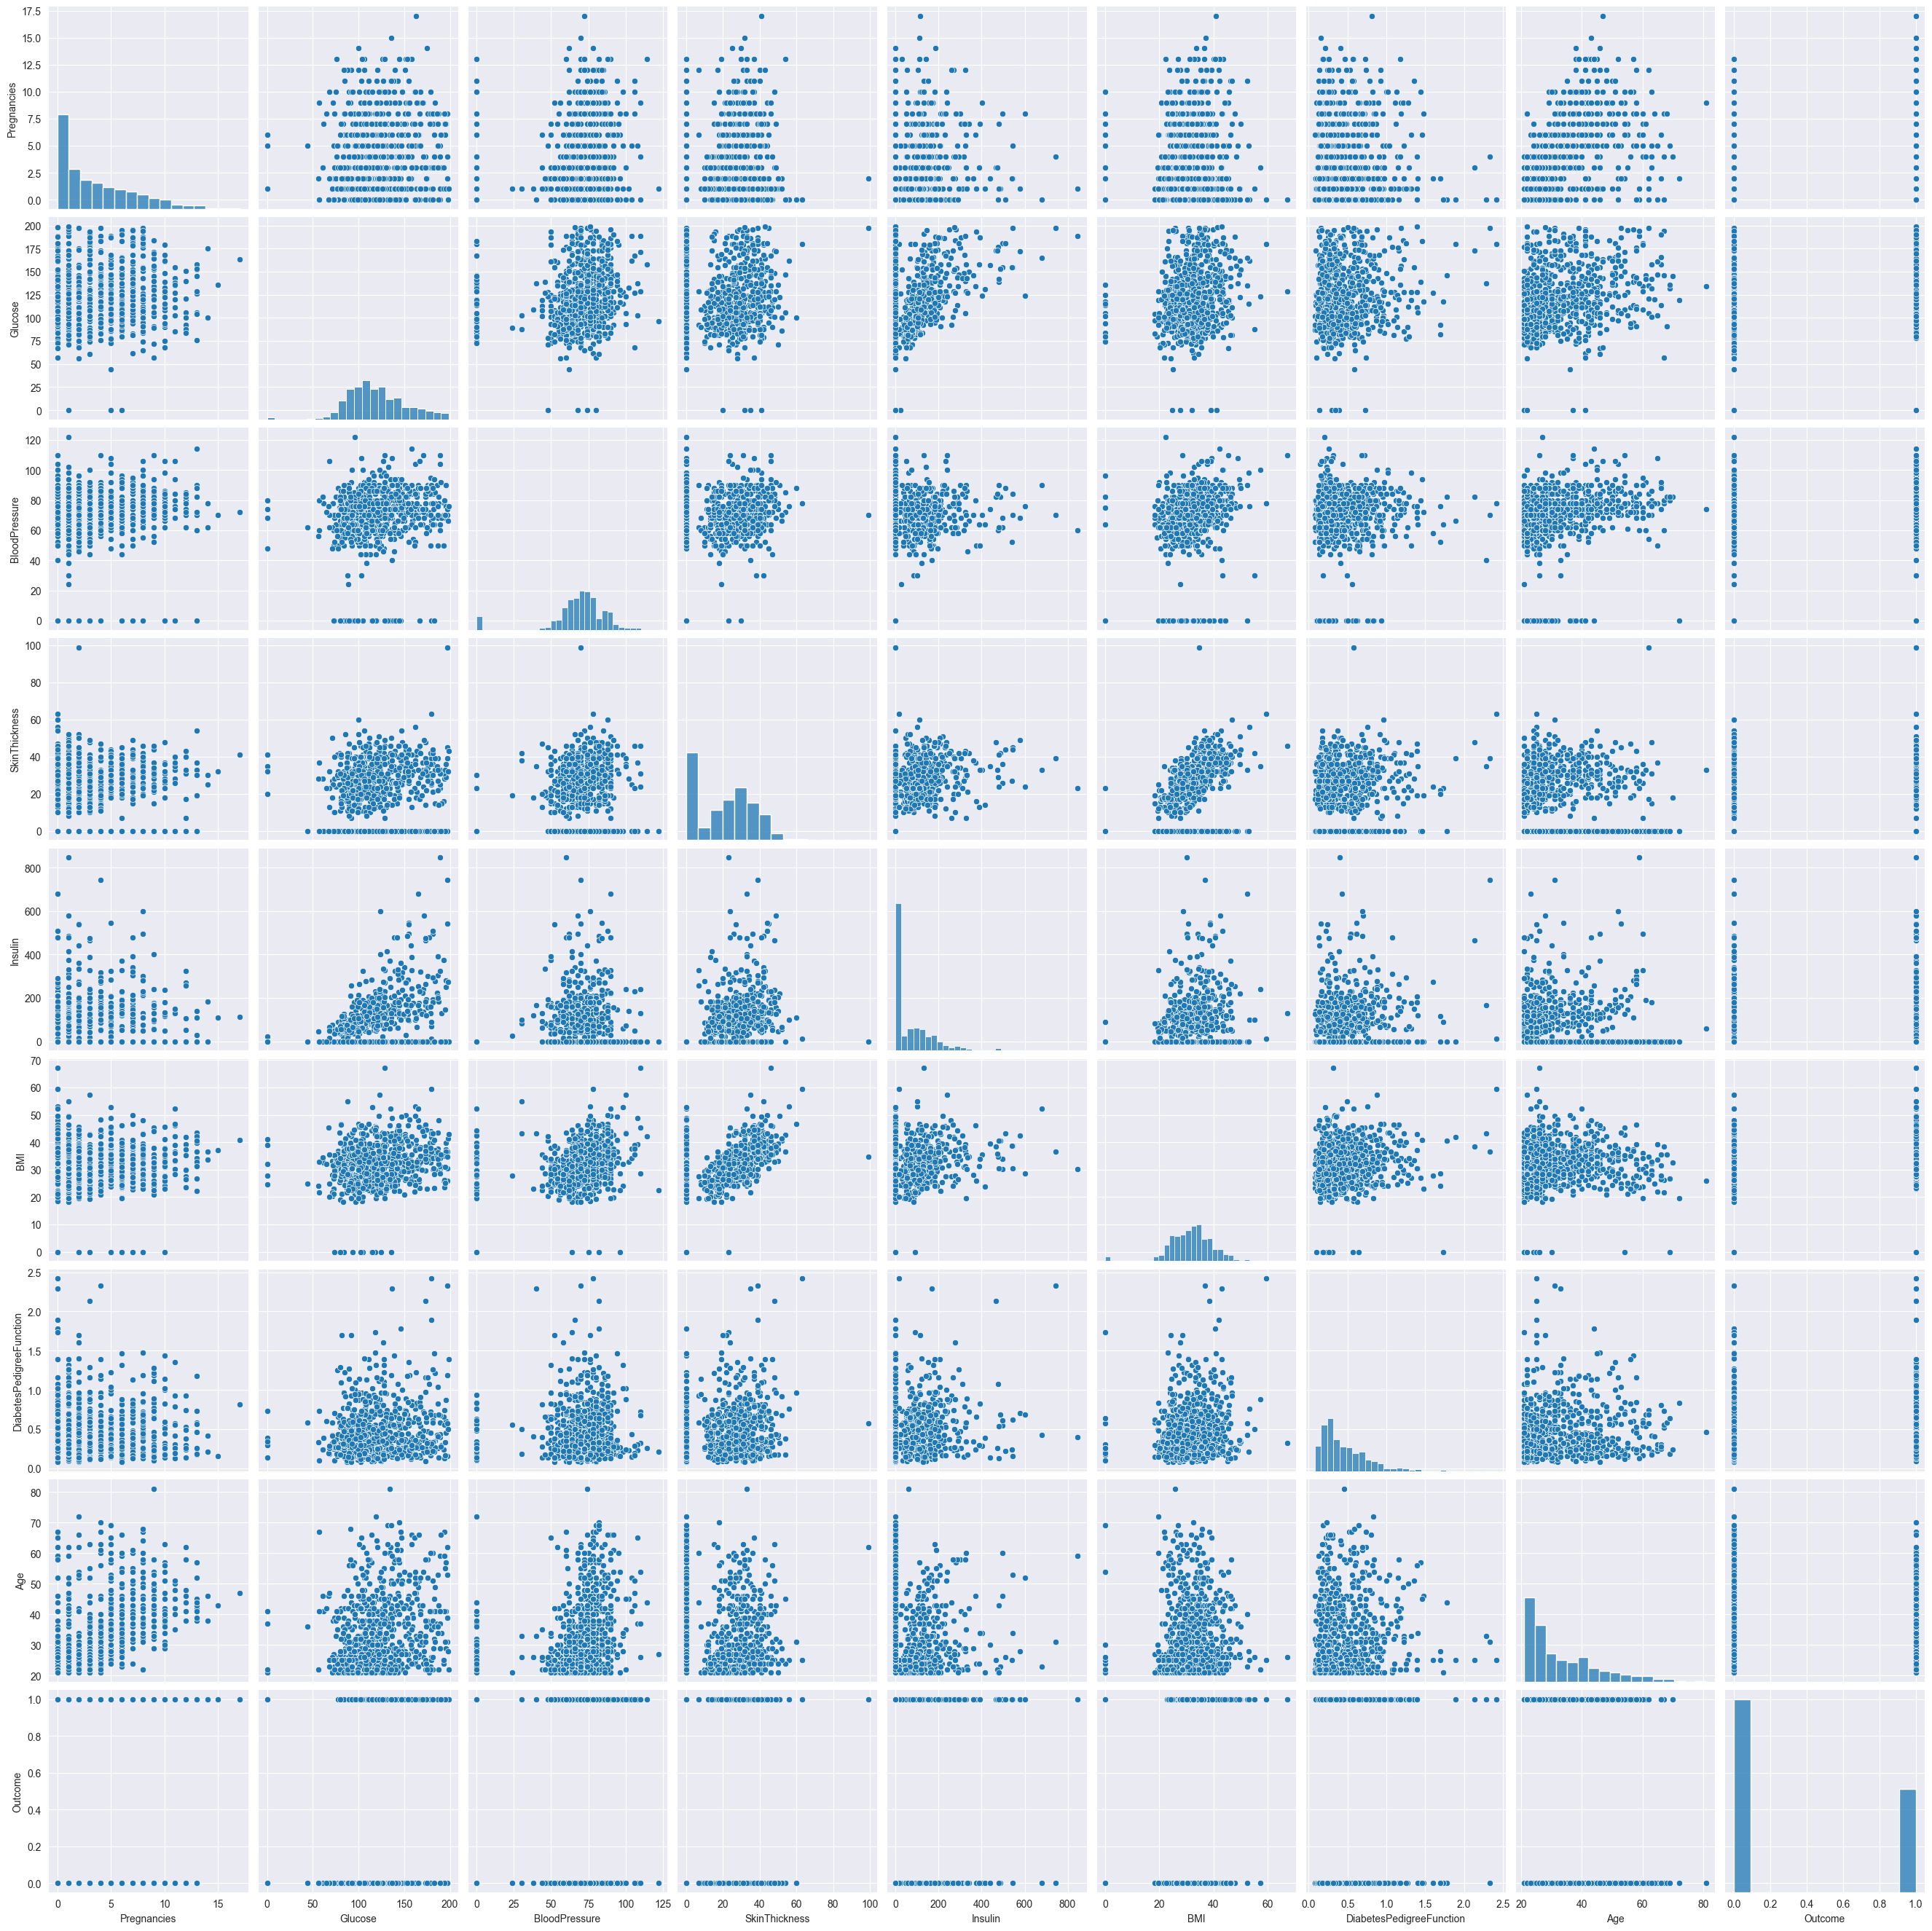

In [103]:
#plotting the data through seaborn' pairplot to visualize pairwise relationship in the data
sns.pairplot(data,height=3)

Text(0.5, 1.0, 'Missing Values per Column')

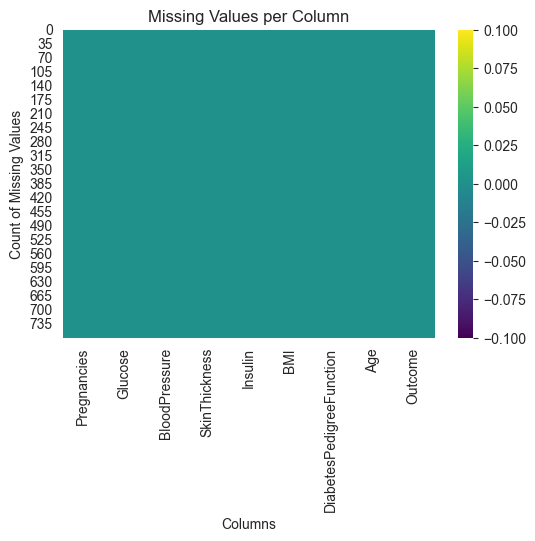

In [213]:
plt.figure(figsize=(6, 4))
sns.heatmap(data.isnull(),cmap='viridis',annot=False)
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.title("Missing Values per Column")

In [125]:
#finding out correlation metrics
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

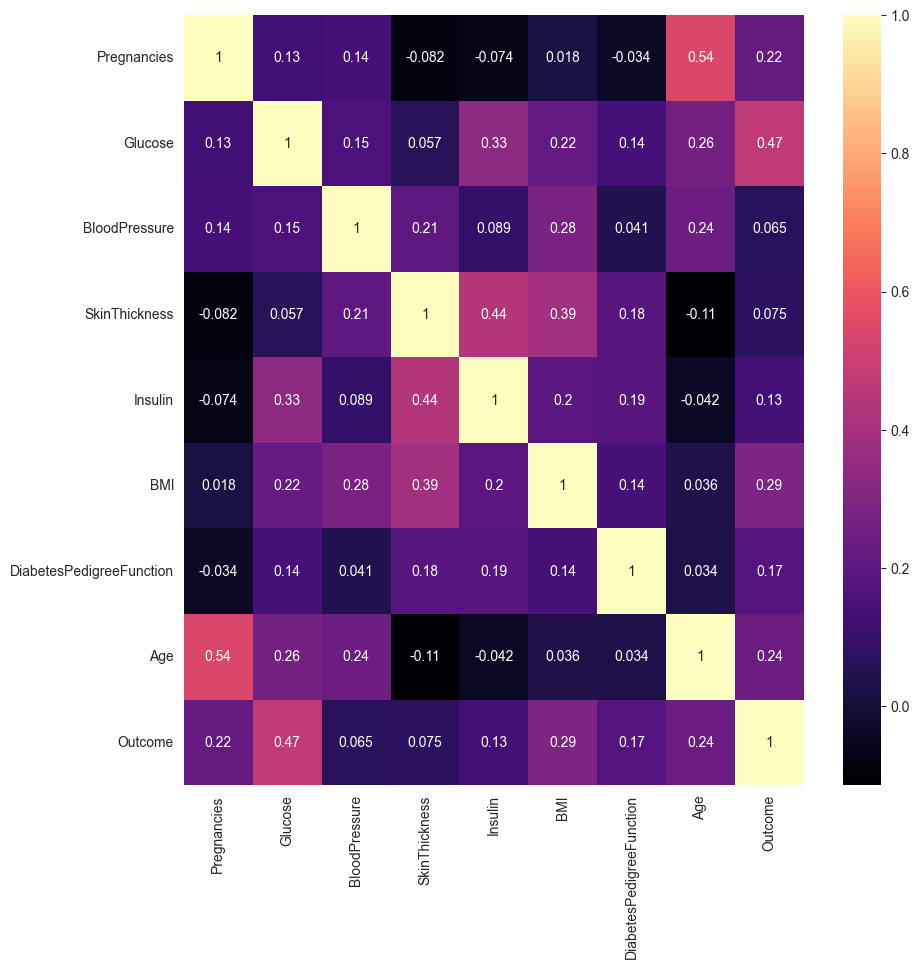

In [129]:
#plotting the correlation through the heatmaps
plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='magma')

In [ ]:
#Scatterplot to represent their relationship

BloodPressure & Glucose

In [134]:
BloodPressure = data['BloodPressure']
Glucose = data['Glucose']

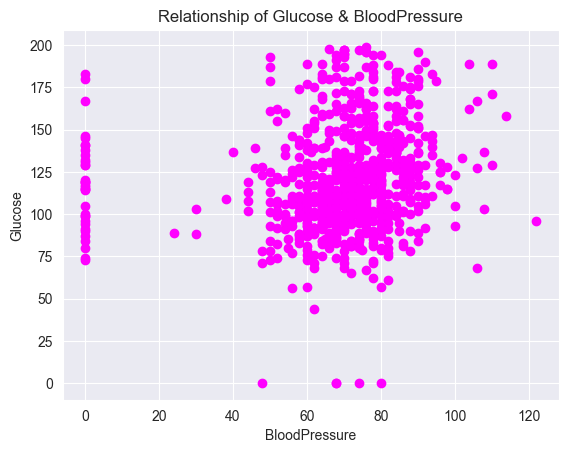

In [143]:
plt.scatter(BloodPressure,Glucose,color=['magenta'])
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
plt.title('Relationship of Glucose & BloodPressure')
plt.show()

BloodPressure & Insulin

In [145]:
Bloodpressure=data['BloodPressure']
Insulin=data['Insulin']

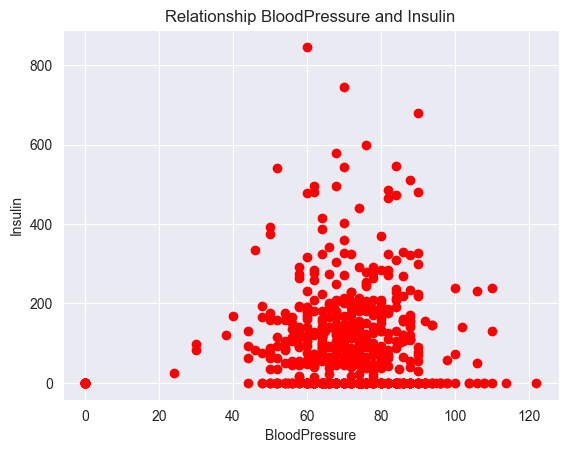

In [151]:
plt.scatter(BloodPressure,Insulin,color=['red'])
plt.xlabel('BloodPressure')
plt.ylabel('Insulin')
plt.title('Relationship BloodPressure and Insulin')
plt.show()

SkinThickness & Insulin

In [152]:
Insulin=data['Insulin']
SkinThickness=data['SkinThickness']

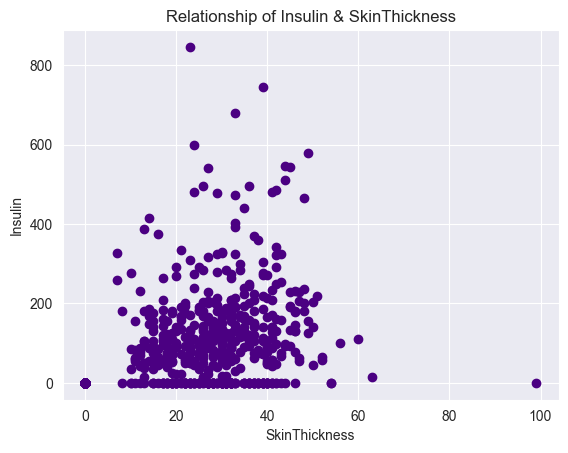

In [159]:
plt.scatter(SkinThickness,Insulin,color=['Indigo'])
plt.xlabel('SkinThickness')
plt.ylabel('Insulin')
plt.title('Relationship of Insulin & SkinThickness')
plt.show()

BMI & SkinThickness

In [160]:
BMI=data['BMI']
SkinThickness=data['SkinThickness']

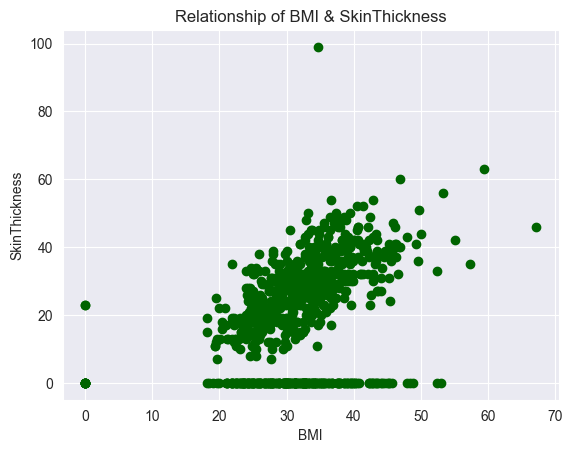

In [169]:
plt.scatter(BMI,SkinThickness,color=['darkgreen'])
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.title('Relationship of BMI & SkinThickness')
plt.show()

In [ ]:
#Data Modeling
#Applying a classification algorithm to build a model.

In [16]:
features = data.iloc[:,[0,1,2,3,4,5,6,7]].values
label = data.iloc[:,8].values

In [17]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [18]:
#Train Test Split
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state =10)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [20]:
#preprocessing

Scale=StandardScaler()
x_train_std=Scale.fit_transform(X_train)
x_test_std=Scale.transform(X_test)

In [21]:
#improving model performance
norm = lambda a:(a-min(a))/(max(a)-min(a))

In [22]:
data_norm = data.iloc[:,:-1]

In [23]:
data_normalized = data_norm.apply(norm)

In [24]:
X_train_norm,X_test_norm,y_train_norm,y_test_norm=train_test_split(data_normalized.values,y,test_size=0.20,random_state=0)

In [25]:
print(X_train_norm.shape)
print(X_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [26]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(405), np.int64(1): np.int64(209)}


In [27]:
#Model creation
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,y_train)

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
print(logistic_regression.score(X_train,y_train))
print(logistic_regression.score(X_test,y_test))

0.7703583061889251
0.7662337662337663


In [29]:
model_l2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')  # C=1.0 is default
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_l2)
print("Test Accuracy with L2 Regularization: {:.2f}".format(accuracy))

Test Accuracy with L2 Regularization: 0.73


In [30]:
model_l1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')  # 'liblinear' supports L1
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_l1)
print("Test Accuracy with L1 Regularization: {:.2f}".format(accuracy))

Test Accuracy with L1 Regularization: 0.77


In [31]:
#hypertuning
for c in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"C={c}: Test Accuracy = {acc:.2f}")

C=0.01: Test Accuracy = 0.69
C=0.1: Test Accuracy = 0.72
C=1: Test Accuracy = 0.73
C=10: Test Accuracy = 0.77
C=100: Test Accuracy = 0.77


In [32]:
conf_mat=confusion_matrix(y_test,logistic_regression.predict(X_test))
conf_mat

array([[88,  7],
       [29, 30]])

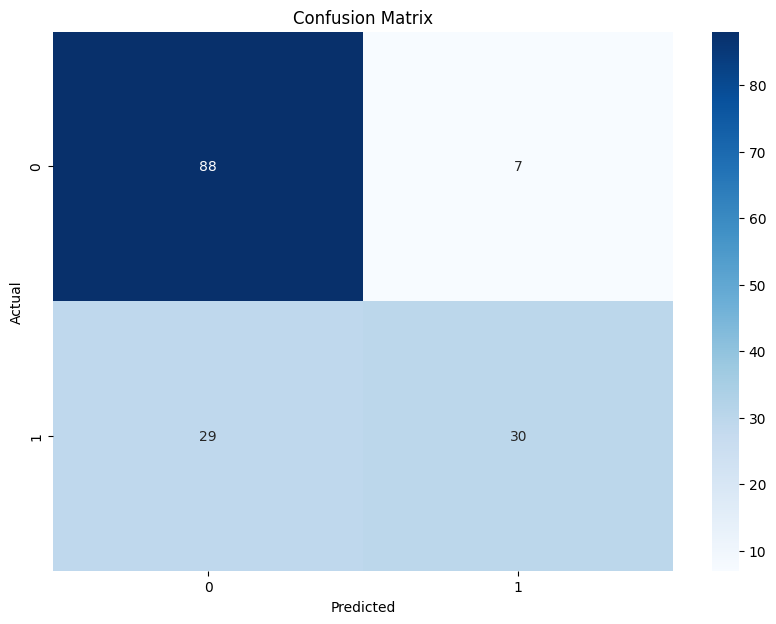

In [33]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
#classification report
print(classification_report(y_test,logistic_regression.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83        95
           1       0.81      0.51      0.62        59

    accuracy                           0.77       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.77      0.77      0.75       154



In [35]:
# Accuracy score
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: {:.2f}".format(accuracy))

Test Accuracy Score: 0.77


In [36]:
#feature selection
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
print("Accuracy after Feature Selection:", acc)

Accuracy after Feature Selection: 0.7337662337662337


C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(


In [37]:
#Preparing Receivers Operating Characteristics(ROC)curve

#predicting the probabilities
probs=logistic_regression.predict_proba(X_test)
probs = probs[:, 1]

#calculating AUC for roc curve
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

AUC: 0.830


AUC: 0.830


Text(0, 0.5, 'True Positive Rate')

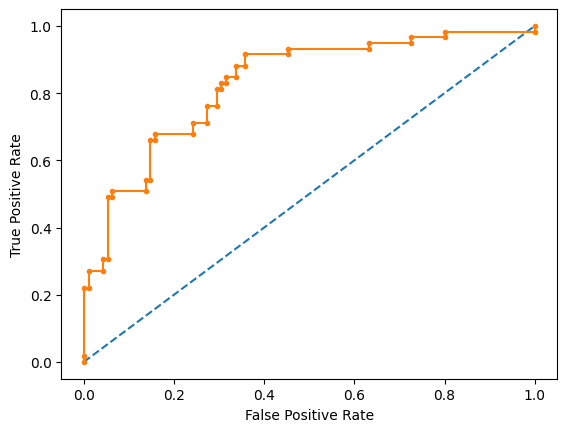

In [38]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
# predict probabilities
probs =logistic_regression.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)

print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [39]:
# Applying Decission Tree Classifier Model

decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [40]:
decision_tree.score(X_train,y_train)

0.8289902280130294

In [41]:
# Accuracy score
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: {:.2f}".format(accuracy))

Test Accuracy Score: 0.77


In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
acc = rf.score(X_test, y_test)
print("Random Forest Accuracy:", acc)

Random Forest Accuracy: 0.7467532467532467


In [53]:
conf_mat=confusion_matrix(y_test,decision_tree.predict(X_test))
conf_mat

array([[85, 10],
       [26, 33]])

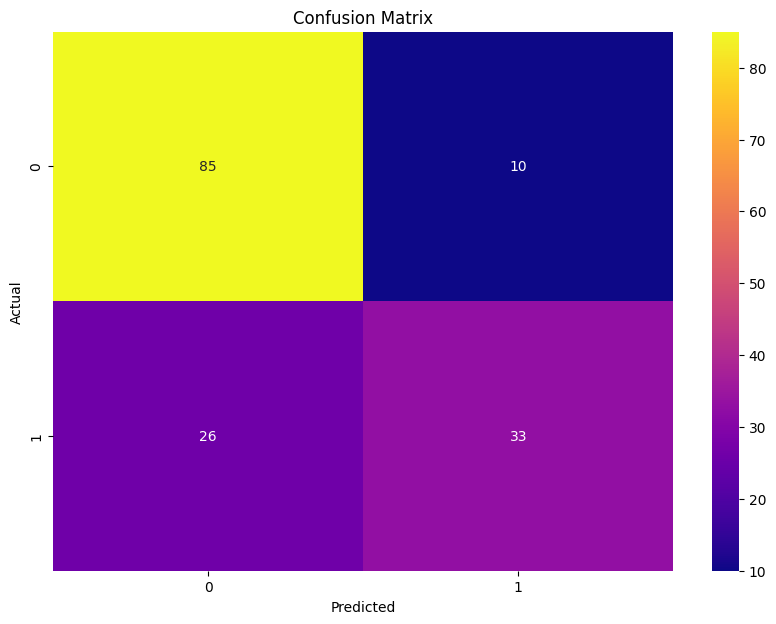

In [57]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='plasma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.800


Text(0, 0.5, 'True Positive Rate')

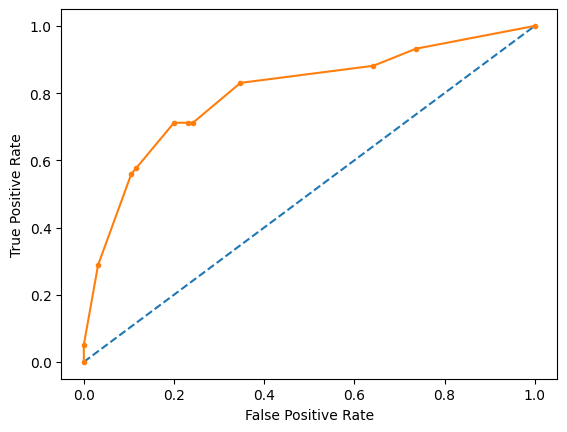

In [58]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
# predict probabilities
probs =decision_tree.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)

print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")